# Generating PDFs with Otter

To generate a PDF of a notebook with Otter, use `otter.export.export_notebook`:

In [1]:
from otter.export import export_notebook
help(export_notebook)

Help on function export_notebook in module otter.export:

export_notebook(nb_path, dest=None, debug=False, exporter_type=None, **kwargs)
    Exports a notebook file at ``nb_path`` to a PDF with optional filtering and pagebreaks. Accepts
    other ``kwargs`` passed to the exporter class's ``convert_notebook`` class method.
    
    Args:
        nb_path (``str``): path to notebook
        dest (``str``, optional): path to write PDF
        debug (``bool``, optional): whether to run export in debug mode
        exporter_type (``str``, optional): the type of exporter to use; one of {'html', 'latex'}



It takes as its first argument the path to the notebook. If `dest` is unspecified, the PDF will be written as the notebook filename with a `.pdf` extension, e.g. `hw01.ipynb -> hw01.pdf`.

In [2]:
export_notebook("otter-pdf-generation.ipynb")
!ls

 AcaDev			      lab06.ipynb
 BUDS-student-su2020	      lab06.pdf
 BUDS-su20		      LEGALST-190
 CE-110			      LEGALST-88
 CE-110-old-delete	     'LS 88'
 COGSCI-1		      LS-88-OpenScience
 colwrit-r4b		      materials-fa17
 core-resources		      materials-fa18
 COVID-19		      materials-sp18
 cs88			      materials-sp20
 data-6-su20		      MCB-50
 ds198_mch_infodemiology      MLmini-lec-old
'DS Curriculum Development'  'Modern Shelving'
 dss-f18		      modules-ipynb
 DSS_fa2019		      otter-pdf-generation.ipynb
 DSS-GM			      otter-pdf-generation.pdf
 dss-pythlib-fa2019	      pdf_test
 E-157AC		      ph196-fa19
 ES-21AC-SP19		     'project4 (2).ipynb'
 ES-21AC-sp20		      Projects
 ESPM-163ac		      PSYCH-167AC
 ESPM-163ac-old		      Rediscovering-Text-as-Data
 fa19			      scikit_learn_data
 final_sp20-2.ipynb	      seaborn-data
 FRENCH-43		      SOC-130AC
 FRENCH-43-1		      stat89a
 geonomics_biogeo_demo	      student
 GM_Meeting_3		      surveydata
 IAS-150		      textbook
 IAS-1

## Cell Filtering

Otter supports cell filtering in order to make grading assignments simpler by removing unneeded context. To use cell filtering, wrap any exportable content in the HTML comments `<!-- BEGIN QUESTION -->` and `<!-- END QUESTION -->` **on their own line** in Markdown.

<!-- BEGIN QUESTION -->

For example, take a look at this cell. On the line above this paragraph, there's an opening comment, so this paragraph (but not anything above) will be exported. So will the code cell below.

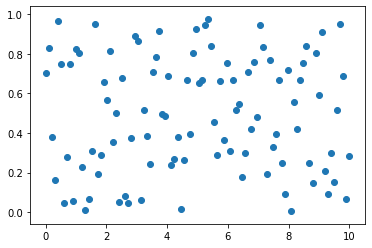

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0, 10, 100)
y = np.random.uniform(0, 1, 100)
plt.scatter(x, y);

<!-- END QUESTION -->

Now take a look at this cell. The first line has a closing comment, so this paragraph won't be exported.

To export a notebook with filtering, use the kwarg `filtering=True`:

In [4]:
export_notebook("otter-pdf-generation.ipynb", filtering=True)

## Pagebreaks

To make it easier to use Gradescope with assignments, Otter will also include pagebreaks between exported sections so that templating can be made easier. To use this, set the kwarg `pagebreaks=True`. Note that you must also set `filtering=True` or `pagebreaks` will be ignored.

To use pagebreaks efficiently, let's look at to consecutive questions.

<!-- BEGIN QUESTION -->

**Question 1:** Do something.

_Student's answer._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2:** Do something else.

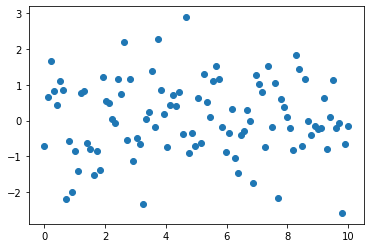

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0, 10, 100)
y = np.random.normal(0, 1, 100)
plt.scatter(x, y);

<!-- END QUESTION -->

Take a look at the cell that contains Question 2. Note that there are _two_ HTML comments in sequence. This tells Otter to include a pagebreak in between the end of Question 1 and the beginning of Question 2.

Let's export the notebook:

In [6]:
export_notebook("otter-pdf-generation.ipynb", filtering=True, pagebreaks=True)